# K Means Clustering with Python

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have to specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

In [1]:
# KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads.
# to avoid the memory leak warning
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.cluster import KMeans

# Create Data
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [5]:
X[:10]

array([[ -6.42884095,  10.14111739],
       [  5.86867888,   5.20110356],
       [ -0.37610937,   3.26427943],
       [  2.16679181,   9.56300522],
       [  5.0950857 ,   7.20752718],
       [-10.87888819,  -6.1131804 ],
       [  2.03405554,   9.76664755],
       [ -1.71798771,   1.4140114 ],
       [  1.16911341,   8.24556988],
       [ -1.35185444,   3.13245345]])

In [6]:
# second column
X[:10, 1:]

array([[10.14111739],
       [ 5.20110356],
       [ 3.26427943],
       [ 9.56300522],
       [ 7.20752718],
       [-6.1131804 ],
       [ 9.76664755],
       [ 1.4140114 ],
       [ 8.24556988],
       [ 3.13245345]])

In [7]:
len(X)

200

In [8]:
X.shape

(200, 2)

In [9]:
y

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [10]:
len(y)

200

In [11]:
y.shape

(200,)

In [12]:
# all the rows in the both column
X[:]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [13]:
# all the rows in the first column
X[:,0]

array([-6.42884095e+00,  5.86867888e+00, -3.76109375e-01,  2.16679181e+00,
        5.09508570e+00, -1.08788882e+01,  2.03405554e+00, -1.71798771e+00,
        1.16911341e+00, -1.35185444e+00, -6.18548214e+00, -1.19856602e+00,
        2.90296863e+00,  2.39250023e+00, -5.27545147e+00, -5.66814687e-01,
        5.97336628e+00, -2.31355268e+00, -1.01344756e+01, -4.54082629e+00,
       -1.04155833e+01,  6.64796693e-01,  2.11460477e+00, -1.11790221e+01,
       -6.63698251e+00, -7.67422005e+00, -7.98668260e+00,  1.27983684e+00,
        3.54480244e+00,  4.03940181e+00, -2.88118898e+00, -9.11009911e+00,
        5.26001172e+00,  2.05859724e+00, -1.71289834e+00, -5.40562319e+00,
       -1.11995123e+01, -1.13753641e+01, -1.17821836e+01,  1.74815503e+00,
       -9.00392334e+00, -2.86564584e+00, -1.42742293e+00, -3.10933432e+00,
        2.71130095e-01,  8.21556561e-01, -4.11495481e+00,  1.55414928e+00,
       -1.16546211e+01, -1.22009637e+00,  3.22017630e+00, -5.40452892e+00,
        6.02795351e+00,  

In [14]:
X[:,0].shape

(200,)

In [15]:
# all the rows in the second column
X[:, 1]

array([ 10.14111739,   5.20110356,   3.26427943,   9.56300522,
         7.20752718,  -6.1131804 ,   9.76664755,   1.4140114 ,
         8.24556988,   3.13245345,   9.67406555,   2.50408937,
         7.91251003,   5.38173971,   9.63836659,   0.05602628,
         5.87172022,   0.52398009,  -3.43130837,  11.39201739,
        -5.67545836,   0.09423047,   3.55938488,  -9.30976605,
         6.39426436,  -7.26839654,  -9.57113308,   0.35315078,
         7.93535678,   4.88870433,   9.12919391,  -7.6978166 ,
         4.74007434,  -2.44083039,   2.51221197,   7.47228315,
        -2.55276744,  -4.94525091,  -9.50883007,   2.05595679,
        -6.20816203,   7.52934153,   8.33519078,  10.16414643,
         2.58303824,   6.76966806,   8.02621345,   3.27657687,
        -8.0067372 ,   4.90466211,  -0.5949262 ,   7.19997027,
         4.0169624 ,   0.67345201,  -5.61883075,   5.98523639,
         4.462053  ,   1.81203497,   5.29262653,   6.73039191,
        -7.95924003,   7.46139251,  -4.95353352,   8.48

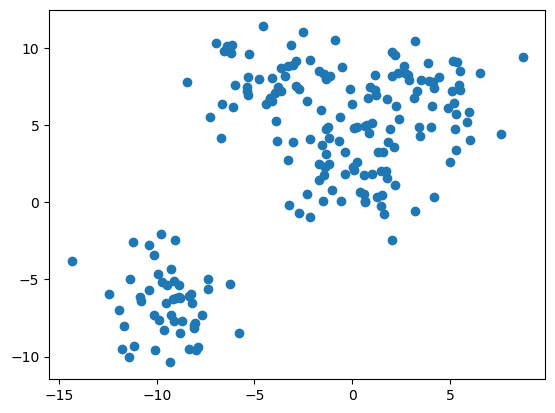

In [16]:
plt.scatter(X[:,0], X[0:,1])

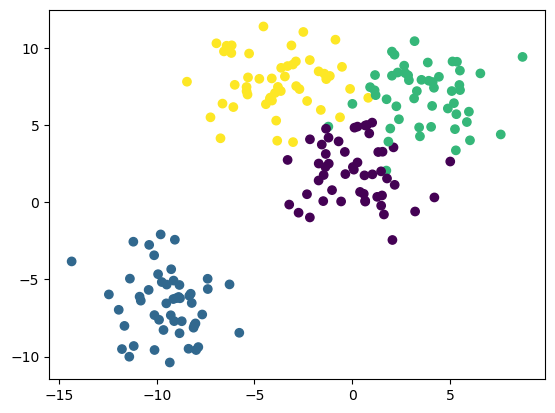

In [17]:
plt.scatter(X[:,0], X[0:,1], c=y)

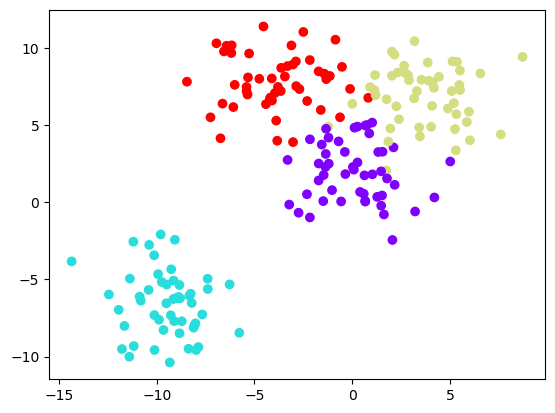

In [18]:
plt.scatter(X[:,0], X[0:,1], c=y, cmap='rainbow')

---

In [19]:
# 4 clusters, 10 number of runs
kmeans = KMeans(n_clusters=4, n_init=10)

In [20]:
kmeans.fit(X=X)

KMeans(n_clusters=4, n_init=10)

In [21]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851]])

In [22]:
kmeans.cluster_centers_.shape

(4, 2)

In [23]:
kmeans.algorithm

'lloyd'

In [24]:
kmeans.n_clusters

4

In [25]:
kmeans.labels_

array([3, 0, 2, 0, 0, 1, 0, 2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 2, 1, 3, 1, 2,
       2, 1, 3, 1, 1, 2, 0, 0, 3, 1, 0, 2, 2, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       2, 0, 3, 2, 1, 2, 2, 3, 0, 2, 1, 3, 2, 2, 3, 0, 1, 0, 1, 3, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 3, 2, 2, 1, 0, 1, 2, 2, 2, 3,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 2, 3, 2, 3, 2, 0, 3, 2, 1, 3, 3, 3,
       2, 1, 1, 3, 0, 3, 0, 2, 1, 0, 1, 3, 3, 0, 2, 1, 3, 3, 3, 3, 2, 0,
       2, 3, 0, 0, 0, 2, 0, 2, 2, 3, 1, 3, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3,
       0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 0, 0,
       1, 2])

In [26]:
# correct labels
y

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

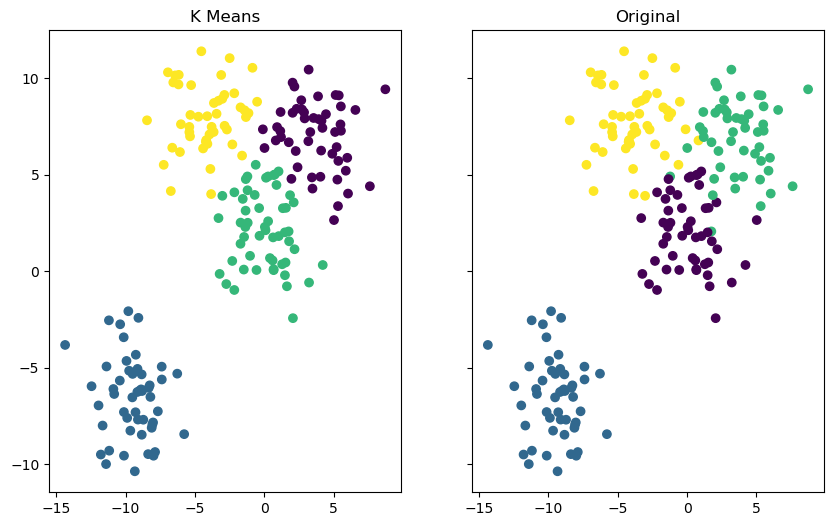

In [27]:
fig , (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title("K Means")
ax1.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c=y)

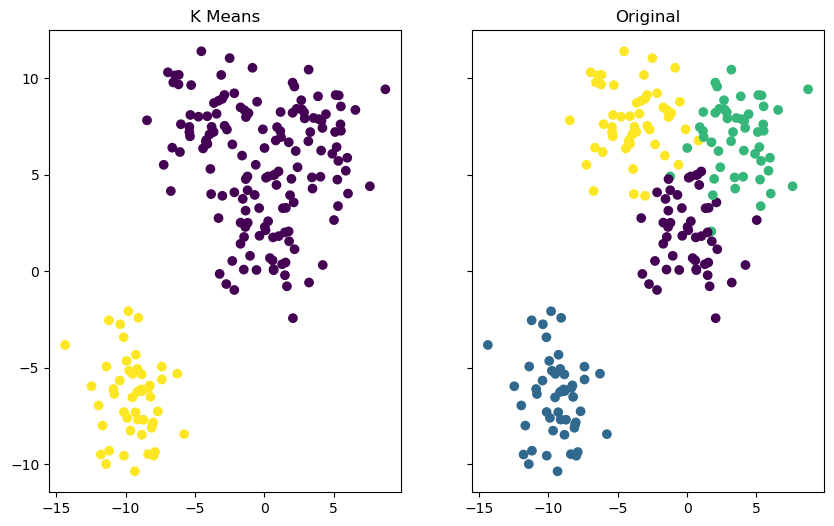

In [28]:
# 2 clusters, 10 number of runs
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X=X)

fig , (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title("K Means")
ax1.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c=y)

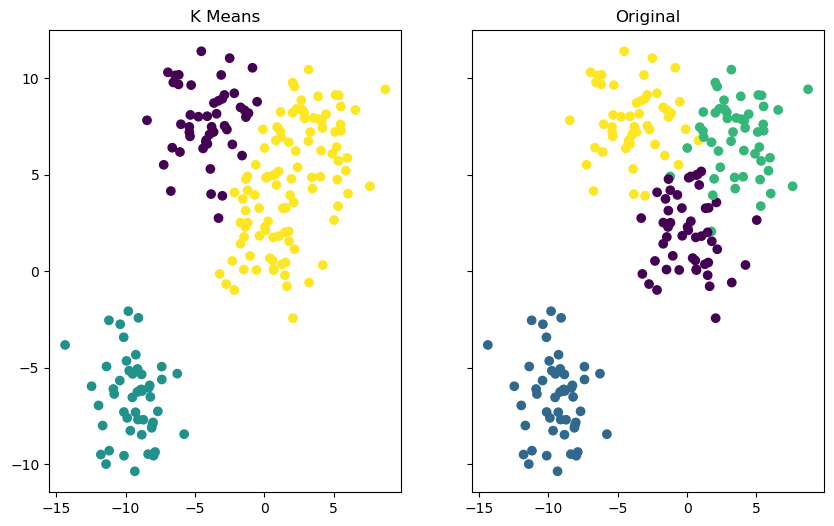

In [29]:
# 3 clusters, 10 number of runs
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X=X)

fig , (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title("K Means")
ax1.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c=y)

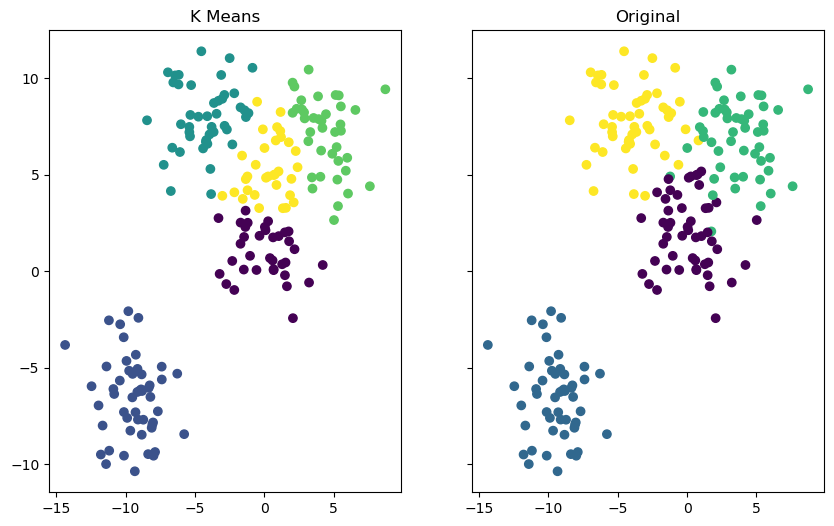

In [30]:
# 5 clusters, 10 number of runs
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(X=X)

fig , (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

ax1.set_title("K Means")
ax1.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

ax2.set_title("Original")
ax2.scatter(X[:, 0], X[:, 1], c=y)